<a href="https://colab.research.google.com/github/Kambey-san/IMBG/blob/HW_lesson_04/KAA_IMBG_HW_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Введение в молекулярную биологию и генетику
### Урок 4. Методы/ДЗ

Используя базу данных NCBI Protein, узнайте, есть ли у белка, который кодирует выбранный на первом занятии ген, известная 3D-структура. Добавьте в таблицу переменную Yes/No, в зависимости от результатов поиска.

Посредством AlphaFold предскажите структуру белка, если она неизвестна. Если известна, найдите белок с неизвестной структурой и предскажите его 3D-структуру, воспользовавшись AlphaFold.

Сделанное практическое задание предоставляется в формате .ipynb.

https://colab.research.google.com/github/deepmind/alphafold/blob/main/notebooks/AlphaFold.ipynb

In [1]:
try:
    import google.colab
    # Running on Google Colab, so install Biopython first
    !pip install biopython
except ImportError:
    pass

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.5 MB/s eta 0:00:00


In [2]:
from Bio import Entrez
Entrez.email = "A.N.Other@example.com"
from Bio import SeqIO
from Bio.Seq import MutableSeq
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import pandas as pd
import xml.etree.ElementTree as ET

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd '/content/drive/MyDrive/Data since in Healthcare/IMBG'

/content/drive/MyDrive/Data since in Healthcare/IMBG


In [5]:
dis = pd.read_table('gene_disease_associations.tsv')
dis

,gene_pli,score,diseaseid,gene_dsi,protein_class_name,geneid,disease_class,disease_type,uniprotid,disease_class_name,disease_name,el,year_initial,source,ei,gene_dpi,protein_class,year_final,gene_symbol,disease_semantic_type
0,1.643200e-05,1.00,C0001080,0.391,Kinase,2261,C16;C05,disease,P22607,"Congenital, Hereditary, and Neonatal Diseas...",Achondroplasia,definitive,1994.0,CURATED,0.974,0.846,DTO_03300101,2020.0,FGFR3,Congenital Abnormality
1,1.040000e-05,0.80,C0000744,0.505,Transporter,4547,C16;C18,disease,P55157,"Congenital, Hereditary, and Neonatal Diseas...",Abetalipoproteinemia,NaN,1985.0,CURATED,0.982,0.846,DTO_05007405,2019.0,MTTP,Disease or Syndrome
2,9.973100e-01,0.80,C0001193,0.380,Kinase,2263,C16;C05,disease,P21802,"Congenital, Hereditary, and Neonatal Diseas...",Apert syndrome,NaN,1994.0,CURATED,0.976,0.808,DTO_03300101,2019.0,FGFR2,Congenital Abnormality
3,5.323500e-01,0.70,C0001418,0.236,Transcription factor,7157,C04,group,P04637,Neoplasms,Adenocarcinoma,NaN,1986.0,CURATED,0.975,0.962,DTO_05007542,2020.0,TP53,Neoplastic Process
4,8.460200e-01,0.69,C0001126,0.522,Transporter,6521,C16;C18;C13;C12,phenotype,P02730,"Congenital, Hereditary, and Neonatal Diseas...",Renal tubular acidosis,NaN,1996.0,CURATED,1.000,0.731,DTO_05007405,2013.0,SLC4A1,Disease or Syndrome
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,1.047800e-06,0.30,C0001430,0.578,NaN,6948,C04,group,P20062,Neoplasms,Adenoma,NaN,2007.0,CURATED,1.000,0.615,NaN,2007.0,TCN2,Neoplastic Process
454,2.095700e-32,0.30,C0001430,0.419,Transporter,9429,C04,group,Q9UNQ0,Neoplasms,Adenoma,NaN,2011.0,CURATED,1.000,0.885,DTO_05007405,2011.0,ABCG2,Neoplastic Process
455,1.000000e+00,0.30,C0001546,0.552,Epigenetic regulator,10014,F03,group,Q9UQL6,Mental Disorders,Adjustment Disorders,NaN,2007.0,CURATED,1.000,0.769,DTO_05007378,2007.0,HDAC5,Mental or Behavioral Dysfunction
456,8.919400e-01,0.30,C0001618,0.636,Enzyme modulator,2771,C04;C19,group,P04899,Neoplasms; Endocrine System Diseases,Tumors of Adrenal Cortex,NaN,NaN,CURATED,NaN,0.577,DTO_05007584,NaN,GNAI2,Neoplastic Process


In [6]:
# Формируем таблицу генов по наименованию болезни
disease_db = dis.loc[dis['disease_name'] == 'Apert syndrome']
disease_db

,gene_pli,score,diseaseid,gene_dsi,protein_class_name,geneid,disease_class,disease_type,uniprotid,disease_class_name,disease_name,el,year_initial,source,ei,gene_dpi,protein_class,year_final,gene_symbol,disease_semantic_type
2,0.99731,0.80,C0001193,0.380,Kinase,2263,C16;C05,disease,P21802,"Congenital, Hereditary, and Neonatal Diseas...",Apert syndrome,NaN,1994.0,CURATED,0.976,0.808,DTO_03300101,2019.0,FGFR2,Congenital Abnormality
126,0.34491,0.31,C0001193,0.397,Transcription factor,7291,C16;C05,disease,Q15672,"Congenital, Hereditary, and Neonatal Diseas...",Apert syndrome,NaN,2005.0,CURATED,1.000,0.846,DTO_05007542,2013.0,TWIST1,Congenital Abnormality


In [7]:
# Получаем список ID генов по наименованию болезни из таблицы
gene_id_list = disease_db['geneid'].tolist()
gene_id_list

[2263, 7291]

In [8]:
# Запрашиваем ID хромосомы из NCBI через параметр 'gi_id'.
# Эта процедура применяется в общей процедуре сбора информации по генам(см. ячейку ниже)
def search_chromosome(gi_id):
    handle = Entrez.esummary(db="nucleotide", id=gi_id)
    record = Entrez.read(handle)
    handle.close()
    return record[0]['AccessionVersion']

In [9]:
def search_gene_name(gene_id):
  handle = Entrez.esummary(db="gene", id=gene_id)
  record = Entrez.read(handle)
  handle.close()
  return record['DocumentSummarySet']['DocumentSummary'][0]['Name']
  # print(record['DocumentSummarySet']['DocumentSummary'][0]['Name'])

In [10]:
# Получаем из NCBI информацию о генах из списка 'gene_id_list', в том числе ID хромосомы.
def get_gene_info(gene_id_list):
  gene_info = []
  for gene_id in gene_id_list:
    handle = Entrez.efetch(db="gene", id=gene_id, rettype = 'xml')
    gene_locus = ET.parse(handle).getroot().find("Entrezgene/Entrezgene_locus")
    region = gene_locus.find("Gene-commentary/Gene-commentary_seqs/Seq-loc/Seq-loc_int/Seq-interval")
    start = int(region.find("Seq-interval_from").text) + 1
    end = int(region.find("Seq-interval_to").text) + 1
    gi_id = region.find("Seq-interval_id/Seq-id/Seq-id_gi").text
    strand = region.find("Seq-interval_strand/Na-strand").get("value")
    # print(gene_id, start, end, gi_id, strand)
    gene_info.append({'gene_name':search_gene_name(gene_id), 'gene_id':gene_id, 'interval_from':start, 'interval_to':end, 'gi_id':gi_id, 'nucleotide':search_chromosome(gi_id), 'strand':strand})
  return gene_info

In [11]:
%%time
# Формируем список по всем генам
gene_list = get_gene_info(gene_id_list)
for i in gene_list:
  print(i)

{'gene_name': 'FGFR2', 'gene_id': 2263, 'interval_from': 121478330, 'interval_to': 121598458, 'gi_id': '568815588', 'nucleotide': 'NC_000010.11', 'strand': 'minus'}
{'gene_name': 'TWIST1', 'gene_id': 7291, 'interval_from': 19113047, 'interval_to': 19117636, 'gi_id': '568815591', 'nucleotide': 'NC_000007.14', 'strand': 'minus'}
CPU times: user 686 ms, sys: 40.9 ms, total: 727 ms
Wall time: 5.85 s


In [12]:
# Предоставляем список генов в виде таблицы
df = pd.DataFrame(gene_list).head(1)
df['accession'] = df['nucleotide'].apply(lambda x: x.split('.')[0])
df['version'] = df['nucleotide'].apply(lambda x: x.split('.')[1])
df.T

,0
gene_name,FGFR2
gene_id,2263
interval_from,121478330
interval_to,121598458
gi_id,568815588
nucleotide,NC_000010.11
strand,minus
accession,NC_000010
version,11


In [13]:
# Получаем нуклеотидную последовательность гена. Параметры берем из 'gene_list'
def get_dna_sequence(gene_seq_keys_list):
  for nucleotid in gene_seq_keys_list:
    nucleotid_id = nucleotid['nucleotide']
    start = nucleotid['interval_from']
    end = nucleotid['interval_to']
    handle = Entrez.efetch(db="nucleotide",
                        id=nucleotid_id,
                        rettype = 'fasta',
                        retmode = 'text')
    # загружаем нуклеотидную последовательность хромосомы
    chromosome = SeqIO.read(handle, 'fasta')
    gene_sym = chromosome.seq[start:end]
    print(f'Gene ID: {nucleotid["gene_id"]}')
    # print('Chromosome description: ' + chromosome.description)
    # print('Gene sequence: ' + gene_sym)
    # print('Gene sequence length: ' + str(len(gene_sym)) + '\n')
    # print(('=' * 100) + '\n')
    return gene_sym

In [14]:
%%time
gene_seq = get_dna_sequence(gene_list)
print(gene_seq)

Gene ID: 2263
ATTAAAAAAATAAGTTGCGTGACATTTATTTTGTCTTGTTAACATTAATATCTGTAGAAACATTTTTATTGTCAGTATAAAAATTAACAGGTTTTATTAAATACTTTCTCCAATTTTGTAACACATAAGATCAGTGTAATCTGCATTCATCTTGCACGGCTATTGCAAAGTGAGTGGGTGTTTCCAAAGCAAAACACAATACTTTAGTACAGAAGGAACAACGGCGATATTTTGTCTGATGTAGGTATGAGGCTGGATCTTTTGGTGAGGTCCTGCCAGAATTAGATGAAAGCAATCCCTTAAAAAGATGGACGTATCCCCAAAACTATCAGCAGAACAACTCTGTGTTTCAATTTTCTATGATGGGACTTGAAGATCCTAACAGGCGTCTCCAACGCCAAAGAGTCTGGAAGCCATTATCAAAATTCACTGAAGAGAATACAGGCTAATCTGATTAATGTGCAACTCAGAAGCAGAAGGCCAGCTGCCAGAGAGAAGCACATTCTGCTATCATTTCAACTAAGGTCTGTCCTCAAGGAATGGATTAAGGCATCTTTTAAGAGGACGCTGGTACCATTTATCTTGGGAAGTCCAGTTAGACGTTGCGTTGACGTAATGACAGGGTTGCACACCAAAATGAAACACCTTCCTATGAATGAGTTCTTTTAATATGGGGCATTTAGGAGGTCTAAGAACAATCGTCTGACAGCAGCATTTAAACACAAATAAATCAAAACTTCATTTTCCCCAAATTAGTCATATATTGTAAATATTCTCTTTTCAAAGGATCTGATAACTAGTTAAGTCCAAGCAATAGATTAACTAGTCTGCTGTGCTGCCTGCATAGAAATGCCACTTAAATTACAAAAAAAACTATAAATGATTAATTGTTTTGTATATTACCAATTTATTAATAAATTAACGTTATACCATTTTCCCTGAAAGCAAAAGTATTTTTCCACCTCTGCTCGGTGAAAATTAAGAAA

In [15]:
len(gene_seq)

120128

Так как ген FGFR2 находится на отрицательной ветви 10 хромосомы,необходимо комплементарно перевернуть последовательность. Создаем новый объект plus_strand_seq, - которым является комплементарный участок положительной ветви.

In [16]:
plus_strand_seq = gene_seq.reverse_complement()
print(plus_strand_seq)

GGCGGCGGCTGGAGGAGAGCGCGGTGGAGAGCCGAGCGGGCGGGCGGCGGGTGCGGAGCGGGCGAGGGAGCGCGCGCGGCCGCCACAAAGCTCGGGCGCCGCGGGGCTGCATGCGGCGTACCTGGCCCGGCGCGGCGACTGCTCTCCGGGCTGGCGGGGGCCGGCCGCGAGCCCCGGGGGCCCCGAGGCCGCAGCTTGCCTGCGCGCTCTGAGCCTTCGCAACTCGCGAGCAAAGTTTGGTGGAGGCAACGCCAAGCCTGAGTCCTTTCTTCCTCTCGTTCCCCAAATCCGAGGGCAGCCCGCGGGCGTCATGCCCGCGCTCCTCCGCAGCCTGGGGTACGCGTGAAGCCCGGGAGGCTTGGCGCCGGCGAAGACCCAAGGACCACTCTTCTGCGTTTGGAGTTGCTCCCCGCAACCCCGGGCTCGTCGCTTTCTCCATCCCGACCCACGCGGGGCGCGGGGACAACACAGGTCGCGGAGGAGCGTTGCCATTCAAGGTAATCGCCGCGCAAGACGCCTCGGGGAGCTTCGCCAGCCGGGGACGTGGGCGCCACGGGAGCCCGGGACGCCGGGTGCACCGTCCTCCGGGCGGGGGGCGCGGAAGGACTAGCATTGTGGAGGACGCTCCGTGTCCTCCCTCTGTGGCTGCATAGGTGATGGGGGAGGTGGGTGCGTGCTGACGGCCGGCGTTCTGGAAGTTCTGCCTCTGCTACCCCCATCCAGATGCTGACATCTGCTTCTGGCGTTGACGCCCCCCTCCCTGTCAAACCCTGGCGGGCGCATTCCCGCTGACTGGGCGCGTTTCTCCGACCCCAGAGCAGACGGGCGGAAGGTTCGCCTGCCCGTGGCACAGCCCCGCAGGCCGGTTCCCGGGGTCATCTCCGAGGTGCCCCATCCGTGTGTCCTGGGAACTTCCGTACCATCCAGGCCCTGCGGAGACCCCTTTTTCGGGAGGGGGCCGCTGGGGTGGGGCCGGTGACATCCCGTAGGGGTGGCGATG

Теперь нужен комплементарный участок отрицательной ветви. Заменяем все основания в соответствии с правилами Уотсона-Крика: A -> T, T -> A, G -> C, C -> G.

In [17]:
minus_strand_seq = plus_strand_seq.complement()
print(minus_strand_seq)

CCGCCGCCGACCTCCTCTCGCGCCACCTCTCGGCTCGCCCGCCCGCCGCCCACGCCTCGCCCGCTCCCTCGCGCGCGCCGGCGGTGTTTCGAGCCCGCGGCGCCCCGACGTACGCCGCATGGACCGGGCCGCGCCGCTGACGAGAGGCCCGACCGCCCCCGGCCGGCGCTCGGGGCCCCCGGGGCTCCGGCGTCGAACGGACGCGCGAGACTCGGAAGCGTTGAGCGCTCGTTTCAAACCACCTCCGTTGCGGTTCGGACTCAGGAAAGAAGGAGAGCAAGGGGTTTAGGCTCCCGTCGGGCGCCCGCAGTACGGGCGCGAGGAGGCGTCGGACCCCATGCGCACTTCGGGCCCTCCGAACCGCGGCCGCTTCTGGGTTCCTGGTGAGAAGACGCAAACCTCAACGAGGGGCGTTGGGGCCCGAGCAGCGAAAGAGGTAGGGCTGGGTGCGCCCCGCGCCCCTGTTGTGTCCAGCGCCTCCTCGCAACGGTAAGTTCCATTAGCGGCGCGTTCTGCGGAGCCCCTCGAAGCGGTCGGCCCCTGCACCCGCGGTGCCCTCGGGCCCTGCGGCCCACGTGGCAGGAGGCCCGCCCCCCGCGCCTTCCTGATCGTAACACCTCCTGCGAGGCACAGGAGGGAGACACCGACGTATCCACTACCCCCTCCACCCACGCACGACTGCCGGCCGCAAGACCTTCAAGACGGAGACGATGGGGGTAGGTCTACGACTGTAGACGAAGACCGCAACTGCGGGGGGAGGGACAGTTTGGGACCGCCCGCGTAAGGGCGACTGACCCGCGCAAAGAGGCTGGGGTCTCGTCTGCCCGCCTTCCAAGCGGACGGGCACCGTGTCGGGGCGTCCGGCCAAGGGCCCCAGTAGAGGCTCCACGGGGTAGGCACACAGGACCCTTGAAGGCATGGTAGGTCCGGGACGCCTCTGGGGAAAAAGCCCTCCCCCGGCGACCCCACCCCGGCCACTGTAGGGCATCCCCACCGCTAC

Преобразуем последовательности ДНК в РНК путем замены каждого вхождения тимина (T) урацилом (U) в соответствии с правилами комплементарности Уотсона-Крика

In [18]:
m_rna = minus_strand_seq.transcribe()
m_rna

Seq('CCGCCGCCGACCUCCUCUCGCGCCACCUCUCGGCUCGCCCGCCCGCCGCCCACG...UUA')

In [19]:
len(m_rna)

120128

In [20]:
m_rna_start = str(m_rna).partition('AUG')
m_rna_start_translation = ''.join(m_rna_start[1::])
print(m_rna_start_translation)
print(len(m_rna_start_translation))

AUGGACCGGGCCGCGCCGCUGACGAGAGGCCCGACCGCCCCCGGCCGGCGCUCGGGGCCCCCGGGGCUCCGGCGUCGAACGGACGCGCGAGACUCGGAAGCGUUGAGCGCUCGUUUCAAACCACCUCCGUUGCGGUUCGGACUCAGGAAAGAAGGAGAGCAAGGGGUUUAGGCUCCCGUCGGGCGCCCGCAGUACGGGCGCGAGGAGGCGUCGGACCCCAUGCGCACUUCGGGCCCUCCGAACCGCGGCCGCUUCUGGGUUCCUGGUGAGAAGACGCAAACCUCAACGAGGGGCGUUGGGGCCCGAGCAGCGAAAGAGGUAGGGCUGGGUGCGCCCCGCGCCCCUGUUGUGUCCAGCGCCUCCUCGCAACGGUAAGUUCCAUUAGCGGCGCGUUCUGCGGAGCCCCUCGAAGCGGUCGGCCCCUGCACCCGCGGUGCCCUCGGGCCCUGCGGCCCACGUGGCAGGAGGCCCGCCCCCCGCGCCUUCCUGAUCGUAACACCUCCUGCGAGGCACAGGAGGGAGACACCGACGUAUCCACUACCCCCUCCACCCACGCACGACUGCCGGCCGCAAGACCUUCAAGACGGAGACGAUGGGGGUAGGUCUACGACUGUAGACGAAGACCGCAACUGCGGGGGGAGGGACAGUUUGGGACCGCCCGCGUAAGGGCGACUGACCCGCGCAAAGAGGCUGGGGUCUCGUCUGCCCGCCUUCCAAGCGGACGGGCACCGUGUCGGGGCGUCCGGCCAAGGGCCCCAGUAGAGGCUCCACGGGGUAGGCACACAGGACCCUUGAAGGCAUGGUAGGUCCGGGACGCCUCUGGGGAAAAAGCCCUCCCCCGGCGACCCCACCCCGGCCACUGUAGGGCAUCCCCACCGCUACCGGUCCCCACCGUGACGACCCCUCCGCUGCCGAGGCCACGGACCCGCGGGGAGCGGGCGUCGGCGGCAGCCGCGACCUCCCUCGCGUCACGCGGACCCCGAUCCCCCGCUUGACCUGG

In [21]:
# Найдем вхождение старт-кодона в последовательности мРНК и отбросим все что до старт-кодона
str(m_rna).find('AUG')

118

In [22]:
# Отображение последовательности по триплетам
def show_in_triplets(seq):
  triplets = re.sub('(.{3})', r'\1 ', str(seq)).split(' ')
  return triplets

In [23]:
import re

In [24]:
show_in_triplets(m_rna[110:125])

['UAC', 'GCC', 'GCA', 'UGG', 'ACC', '']

In [25]:
m_rna_start_translation = m_rna[118::]
m_rna_start_translation

Seq('AUGGACCGGGCCGCGCCGCUGACGAGAGGCCCGACCGCCCCCGGCCGGCGCUCG...UUA')

In [26]:
len(m_rna_start_translation)

120010

Произведем трансляцию РНК в белок.

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
protein = Seq(m_rna_start_translation).translate()
protein

Seq('MDRAAPLTRGPTAPGRRSGPPGLRRRTDARDSEALSARFKPPPLRFGLRKEGEQ...KKI')

In [29]:
len(protein)

40003

In [30]:
# Добавим последовательность белка в таблицу
df['prot.seq.example'] = str(protein)

In [31]:
# Сохраняем полученную последовательность белка в файл
record = SeqRecord(protein, id="FGFR2 Gene ID: 2263", description="translated Human fibroblast growth factor receptor 2 protein sequence")
outputname = '2263_FGFR2_protein.fasta'
SeqIO.write(record, outputname, 'fasta')

1

In [32]:
# Получим список баз которым можно обратиться через модуль `Entrez`
handle = Entrez.einfo()
record = Entrez.read(handle)
handle.close()
record

{'DbList': ['pubmed', 'protein', 'nuccore', 'ipg', 'nucleotide', 'structure', 'genome', 'annotinfo', 'assembly', 'bioproject', 'biosample', 'blastdbinfo', 'books', 'cdd', 'clinvar', 'gap', 'gapplus', 'grasp', 'dbvar', 'gene', 'gds', 'geoprofiles', 'medgen', 'mesh', 'nlmcatalog', 'omim', 'orgtrack', 'pmc', 'popset', 'proteinclusters', 'pcassay', 'protfam', 'pccompound', 'pcsubstance', 'seqannot', 'snp', 'sra', 'taxonomy', 'biocollections', 'gtr']}

In [33]:
# Получаем список транскрипций по имени гена из базы `nuccore`
handle = Entrez.esearch(db="nuccore",
                        term='FGFR2[Gene Name] AND "homo sapiens"[Organism] AND RefSeq[Keyword]',
                        # usehistory="y",
                        retmax=30)
record = Entrez.read(handle)
handle.close()
record

{'Count': '38', 'RetMax': '30', 'RetStart': '0', 'IdList': ['1890284386', '1889443442', '1771805607', '1677501539', '394025691', '222144230', '2324154561', '1701948118', '1889498142', '1677539445', '1677531698', '1677529853', '222144232', '1004170713', '568815588', '2194973501', '2462517776', '2462517774', '2462517772', '2462517770', '2462517768', '2462517766', '2462517764', '2462517762', '2462517760', '2462517758', '2462517756', '2217276108', '2217276107', '2217276106'], 'TranslationSet': [{'From': '"homo sapiens"[Organism]', 'To': '"Homo sapiens"[Organism]'}], 'TranslationStack': [{'Term': 'FGFR2[Gene Name]', 'Field': 'Gene Name', 'Count': '5823', 'Explode': 'N'}, {'Term': '"Homo sapiens"[Organism]', 'Field': 'Organism', 'Count': '28552536', 'Explode': 'Y'}, 'AND', {'Term': 'RefSeq[Keyword]', 'Field': 'Keyword', 'Count': '112470012', 'Explode': 'N'}, 'AND'], 'QueryTranslation': 'FGFR2[Gene Name] AND "Homo sapiens"[Organism] AND RefSeq[Keyword]'}

In [34]:
transcript_id_list = record['IdList']
transcript_id_list

['1890284386', '1889443442', '1771805607', '1677501539', '394025691', '222144230', '2324154561', '1701948118', '1889498142', '1677539445', '1677531698', '1677529853', '222144232', '1004170713', '568815588', '2194973501', '2462517776', '2462517774', '2462517772', '2462517770', '2462517768', '2462517766', '2462517764', '2462517762', '2462517760', '2462517758', '2462517756', '2217276108', '2217276107', '2217276106']

In [35]:
# Выгрузим информацию обо всех транскрипциях гена из `transcript_id_list`
def get_transcriptions_info(transcript_id_list):
  transcript_info = []
  for i in transcript_id_list:
    handle = Entrez.efetch(db="nuccore",
                           id=i,
                           rettype = 'gb',
                           retmode = 'text')
    info = SeqIO.read(handle, 'gb')
    if str(info.name).find('NC') and str(info.name).find('NG'):
      transcript_info.append({'id':info.id, 'name':info.name, 'seq':info.seq, 'description':info.description})
    # print(info.name)
    # print(info.seq)
  return transcript_info

In [36]:
transcriptions_list = get_transcriptions_info(transcript_id_list)

In [37]:
for transcript in transcriptions_list:
  print(transcript)

{'id': 'NM_001320654.2', 'name': 'NM_001320654', 'seq': Seq('ACAGACTCTCCCGCAGAACTGACCCCAGCAAGAAGCCTTTGGGAGCAGTAGAGA...TAA'), 'description': 'Homo sapiens fibroblast growth factor receptor 2 (FGFR2), transcript variant 15, mRNA'}
{'id': 'NM_001144916.2', 'name': 'NM_001144916', 'seq': Seq('GAGCACACATTGCCTCACTGAAGTGGCTGCACGTATCTGAGTCCTGTAGCTACT...TAA'), 'description': 'Homo sapiens fibroblast growth factor receptor 2 (FGFR2), transcript variant 6, mRNA'}
{'id': 'NM_000141.5', 'name': 'NM_000141', 'seq': Seq('GAGAGCGCGGTGGAGAGCCGAGCGGGCGGGCGGCGGGTGCGGAGCGGGCGAGGG...TAA'), 'description': 'Homo sapiens fibroblast growth factor receptor 2 (FGFR2), transcript variant 1, mRNA'}
{'id': 'NM_001144919.2', 'name': 'NM_001144919', 'seq': Seq('GAGAGCGCGGTGGAGAGCCGAGCGGGCGGGCGGCGGGTGCGGAGCGGGCGAGGG...AAA'), 'description': 'Homo sapiens fibroblast growth factor receptor 2 (FGFR2), transcript variant 9, mRNA'}
{'id': 'NM_023029.2', 'name': 'NM_023029', 'seq': Seq('TGACTGCAGCAGCAGCGGCAGCGCCTCGGTTCCTGAGC

In [38]:
# Находим самую длинную транскрипцию
def find_longest_transcript(transcriptions_list):
  max = 0
  for i in transcriptions_list:
    if len(i.get('seq')) > max:
      max = len(i.get('seq'))
  return max, i.get('name'), i.get('seq'), i.get('description')

In [39]:
longest_transcript = find_longest_transcript(transcriptions_list)
longest_transcript

(4733,
 'XM_024447891',
 Seq('GGCGGCGGCTGGAGGAGAGCGCGGTGGAGAGCCGAGCGGGCGGGCGGCGGGTGC...ATA'),
 'PREDICTED: Homo sapiens fibroblast growth factor receptor 2 (FGFR2), transcript variant X9, mRNA')

In [40]:
longest_transcript[2].transcribe().translate()

Seq('GGGWRRARWRAERAGGGCGAGEGARAAATKLGRRGAACGVPGPARRLLSGLAGA...FF*')

In [41]:
# Переведем нуклеотидную последовательность самой длинной транскрипции в белок
long_trans_protein = longest_transcript[2].transcribe().translate()
long_trans_protein

Seq('GGGWRRARWRAERAGGGCGAGEGARAAATKLGRRGAACGVPGPARRLLSGLAGA...FF*')

In [42]:
# Добавим сведения о транскрипциях в таблицу
df['gr_acid_num'] = len(long_trans_protein)
df['num_of_transcripts'] = len(transcriptions_list)
df.T

,0
gene_name,FGFR2
gene_id,2263
interval_from,121478330
interval_to,121598458
gi_id,568815588
nucleotide,NC_000010.11
strand,minus
accession,NC_000010
version,11
prot.seq.example,MDRAAPLTRGPTAPGRRSGPPGLRRRTDARDSEALSARFKPPPLRF...


In [43]:
# Получаем список ID всех missense мутаций по  ID гена из базы `snp`
handle = Entrez.esearch(db="snp",
                        term='2263[Gene ID] AND "homo sapiens"[Organism] AND "pathogenic"[Clinical Significance] AND "missense variant"[Function Class]',
                        # usehistory="y",
                        retmax=100)
record = Entrez.read(handle)
handle.close()
record

{'Count': '49', 'RetMax': '49', 'RetStart': '0', 'IdList': ['2134256250', '1850289942', '1847510893', '1845559552', '1589722765', '1564919048', '1554928884', '1554927408', '1434545235', '1358919643', '1274989878', '1057519047', '1057519044', '1057519043', '1057519040', '1057519039', '1057519037', '1057519036', '776587763', '387907372', '387906678', '387906677', '387906676', '281865420', '121918510', '121918509', '121918508', '121918507', '121918506', '121918505', '121918504', '121918502', '121918501', '121918500', '121918499', '121918497', '121918496', '121918495', '121918494', '121918493', '121918492', '121918490', '121918489', '121918488', '121918487', '121913478', '121913477', '79184941', '77543610'], 'TranslationSet': [], 'TranslationStack': [{'Term': '2263[Gene ID]', 'Field': 'Gene ID', 'Count': '51388', 'Explode': 'N'}, {'Term': '"homo sapiens"[Organism]', 'Field': 'Organism', 'Count': '1116839409', 'Explode': 'Y'}, 'AND', {'Term': '"pathogenic"[Clinical Significance]', 'Field': 

In [44]:
rs_list = record['IdList']
rs_list

['2134256250', '1850289942', '1847510893', '1845559552', '1589722765', '1564919048', '1554928884', '1554927408', '1434545235', '1358919643', '1274989878', '1057519047', '1057519044', '1057519043', '1057519040', '1057519039', '1057519037', '1057519036', '776587763', '387907372', '387906678', '387906677', '387906676', '281865420', '121918510', '121918509', '121918508', '121918507', '121918506', '121918505', '121918504', '121918502', '121918501', '121918500', '121918499', '121918497', '121918496', '121918495', '121918494', '121918493', '121918492', '121918490', '121918489', '121918488', '121918487', '121913478', '121913477', '79184941', '77543610']

In [45]:
# Получаем информацию по каждой мутации из списка
def get_snp_rs_info(rs_list):
  snp_rs_info = []
  for i in rs_list:
    handle = Entrez.esearch(db="snp", term="rs" + i)
    record = Entrez.read(handle)
    handle.close()
    idlist = record["IdList"]
    if len(idlist) > 0:
        handle = Entrez.esummary(db="snp", id=",".join(idlist))
        result = Entrez.read(handle)
        handle.close()
        snp_info = result['DocumentSummarySet']['DocumentSummary'][0]
        snp_rs_info.append({'SNP_ID':snp_info['SNP_ID'], 'GENES':snp_info['GENES'], 'ACC':snp_info['ACC'], 'SPDI':snp_info['SPDI']})
  return snp_rs_info

In [46]:
# Возьмем небольшое количество ID из предыдущего запроса
rs_tiny = rs_list[5 : 7]
rs_tiny

['1564919048', '1554928884']

In [47]:
rs_sample = get_snp_rs_info(rs_tiny)
rs_sample

[{'SNP_ID': '1564919048',
  'GENES': [{'NAME': 'FGFR2', 'GENE_ID': '2263'}],
  'ACC': 'NC_000010.11',
  'SPDI': 'NC_000010.11:121520105:C:A,NC_000010.11:121520105:C:G,NC_000010.11:121520105:C:T'},
 {'SNP_ID': '1554928884',
  'GENES': [{'NAME': 'FGFR2', 'GENE_ID': '2263'}],
  'ACC': 'NC_000010.11',
  'SPDI': 'NC_000010.11:121517383:T:A,NC_000010.11:121517383:T:C'}]

In [48]:
# Добавим сведения о количестве missense мутаций FGFR2 в таблицу
df['rs'] = len(rs_list)
df.T

,0
gene_name,FGFR2
gene_id,2263
interval_from,121478330
interval_to,121598458
gi_id,568815588
nucleotide,NC_000010.11
strand,minus
accession,NC_000010
version,11
prot.seq.example,MDRAAPLTRGPTAPGRRSGPPGLRRRTDARDSEALSARFKPPPLRF...


In [49]:
# Создаем копию оригинального гена
mutable_seq = MutableSeq(minus_strand_seq)
mutable_seq

MutableSeq('CCGCCGCCGACCTCCTCTCGCGCCACCTCTCGGCTCGCCCGCCCGCCGCCCACG...TTA')

In [50]:
# Найдем старт кодон
def find_start_codon_dna(mutable_seq):
  return str(mutable_seq).find('ATG')

In [51]:
# Выделим последовательность гена после старт кодона
start = find_start_codon_dna(mutable_seq)
semantic_seq = mutable_seq[start::]
semantic_seq

MutableSeq('ATGGACCGGGCCGCGCCGCTGACGAGAGGCCCGACCGCCCCCGGCCGGCGCTCG...TTA')

Старт кодон находится в 118-120 положении ДНК. Участок 118-306 нуклеотид ДНК будем использовать для мутаций синонимичной замены, миссенс и нонсенс мутаций

In [52]:
# Отобразим исходную последовательность белка
semantic_seq.transcribe().translate()

MutableSeq('MDRAAPLTRGPTAPGRRSGPPGLRRRTDARDSEALSARFKPPPLRFGLRKEGEQ...KKI')

**True Silence mutation**

Для данной мутации мы заменим первый триплет в начале последовательности нашего гена.

In [53]:
# Скопируем исходный ген в новую переменную
true_silence_seq = mutable_seq

In [54]:
# Отобразим нужный участок последовательности нуклеотидов
true_silence_seq[0:9]

MutableSeq('CCGCCGCCG')

In [55]:
# Заменим первые три нуклеотида последовательноси 'CCG' на 'TCT'
true_silence_seq[0:3] = "TCT"
true_silence_seq[0:9]

MutableSeq('TCTCCGCCG')

In [56]:
# Отобразим последовательность белка после изменений (старт кодон в 118 положении)
start = find_start_codon_dna(true_silence_seq)
true_silence_seq[start::].transcribe().translate()

MutableSeq('MDRAAPLTRGPTAPGRRSGPPGLRRRTDARDSEALSARFKPPPLRFGLRKEGEQ...KKI')

In [57]:
# Сравним белковые последовательности до и после изменений
semantic_seq.transcribe().translate() == true_silence_seq[start::].transcribe().translate()

True

**Synonimic mutation**

Для этой и последующих мутаций возьмем участок гена после старт-кодона. Для этого найдем в нуклеотидной последовательности гена позицию первого вхождения триплета ATG (AUG в мРНК)

In [58]:
# Скопируем исходный ген в новую переменную
synonimic_seq = semantic_seq
synonimic_seq

MutableSeq('ATGGACCGGGCCGCGCCGCTGACGAGAGGCCCGACCGCCCCCGGCCGGCGCTCG...TTA')

Для удобства отобразим участок нуклеотидной последовательности по триплетам, обозначим старт и стоп кодоны в коде ДНК, укажем позиции нуклеотидов (1-я буква триплета) и соответствующих им аминокислот

In [59]:
# Функция отображения ДНК по триплетам
def view_triplets_dna(string):
  protein_seq_pos_num = 0
  dna_seq = 0
  codons = [string[i:i+3] for i in range(0, len(string), 3)]
  for triplet in codons:
    if triplet == 'ATG':
      print(f'{protein_seq_pos_num}  {dna_seq}  {triplet}  <<<---START CODON')
    elif triplet == 'TAG' or triplet == 'TGA' or triplet == 'TAA':
      print(f'{protein_seq_pos_num}  {dna_seq}  {triplet}  <<<---STOP CODON')
    else:
      print(f'{protein_seq_pos_num}  {dna_seq}  {triplet}')
    dna_seq += 3
    protein_seq_pos_num += 1

In [60]:
show_in_triplets(synonimic_seq[:60])

['ATG',
 'GAC',
 'CGG',
 'GCC',
 'GCG',
 'CCG',
 'CTG',
 'ACG',
 'AGA',
 'GGC',
 'CCG',
 'ACC',
 'GCC',
 'CCC',
 'GGC',
 'CGG',
 'CGC',
 'TCG',
 'GGG',
 'CCC',
 '']

In [61]:
view_triplets_dna(synonimic_seq[:189])

0  0  ATG  <<<---START CODON
1  3  GAC
2  6  CGG
3  9  GCC
4  12  GCG
5  15  CCG
6  18  CTG
7  21  ACG
8  24  AGA
9  27  GGC
10  30  CCG
11  33  ACC
12  36  GCC
13  39  CCC
14  42  GGC
15  45  CGG
16  48  CGC
17  51  TCG
18  54  GGG
19  57  CCC
20  60  CCG
21  63  GGG
22  66  CTC
23  69  CGG
24  72  CGT
25  75  CGA
26  78  ACG
27  81  GAC
28  84  GCG
29  87  CGA
30  90  GAC
31  93  TCG
32  96  GAA
33  99  GCG
34  102  TTG
35  105  AGC
36  108  GCT
37  111  CGT
38  114  TTC
39  117  AAA
40  120  CCA
41  123  CCT
42  126  CCG
43  129  TTG
44  132  CGG
45  135  TTC
46  138  GGA
47  141  CTC
48  144  AGG
49  147  AAA
50  150  GAA
51  153  GGA
52  156  GAG
53  159  CAA
54  162  GGG
55  165  GTT
56  168  TAG  <<<---STOP CODON
57  171  GCT
58  174  CCC
59  177  GTC
60  180  GGG
61  183  CGC
62  186  CCG


In [62]:
synonimic_seq[:189]

MutableSeq('ATGGACCGGGCCGCGCCGCTGACGAGAGGCCCGACCGCCCCCGGCCGGCGCTCG...CCG')

In [63]:
synonimic_seq[:189].transcribe().translate()

MutableSeq('MDRAAPLTRGPTAPGRRSGPPGLRRRTDARDSEALSARFKPPPLRFGLRKEGEQ...GRP')

Как мы видим в начале аминокислотной последовательности белка есть несколько аминокислот 'Аланин'. Посмотрим их кодоны и попробуем заменить так, чтобы аминокислотная последовательность не изменилась

In [64]:
# Отобразим нужный участок последовательности нуклеотидов
synonimic_seq[:15]

MutableSeq('ATGGACCGGGCCGCG')

In [65]:
# Отобразим белковую последовательность выбранного участка
synonimic_seq[0:21].transcribe().translate()

MutableSeq('MDRAAPL')

Аминокислота 'Аланин' кодируется одним из четырех триплетов: 'GCT', 'GCC', 'GCA' или 'GCG'. Заменим 2 триплета 'GCC' и 'GCG' в положении 9-14 на 'GCA' и 'GCT'.

In [66]:
# Заменим последовательность нуклеотидов
synonimic_seq[9:12] = "GCA"
synonimic_seq[12:15] = "GCT"
synonimic_seq[:15]

MutableSeq('ATGGACCGGGCAGCT')

In [67]:
# Отобразим мутантную последовательность белка
synonimic_seq[:21].transcribe().translate()

MutableSeq('MDRAAPL')

In [68]:
# Сравним белковые последовательности до и после изменений
semantic_seq.transcribe().translate() == synonimic_seq.transcribe().translate()

True

**Вывод:** не смотря на изменение кода ДНК, аминокислотный состав белка остался тем же

**Missense mutation**

In [69]:
# Скопируем исходный ген в новую переменную и отбросим нуклеотиды до старт-кодона
missense_seq = semantic_seq
missense_seq

MutableSeq('ATGGACCGGGCAGCTCCGCTGACGAGAGGCCCGACCGCCCCCGGCCGGCGCTCG...TTA')

In [70]:
# Отобразим нужный участок последовательности нуклеотидов
missense_seq[:33]

MutableSeq('ATGGACCGGGCAGCTCCGCTGACGAGAGGCCCG')

In [71]:
# Отобразим белковую последовательность выбранного участка
missense_seq[:33].transcribe().translate()

MutableSeq('MDRAAPLTRGP')

**Вывод:** для missense-мутации заменим аминокислоту 'Аргинин' в 9-м положении на 'Аспарагиновую кислоту'. Для этого поменяем триплет 'AGA' [24-26] на 'GAC'

In [72]:
# Заменим последовательность нуклеотидов
missense_seq[24:27] = "GAC"
missense_seq[:27]

MutableSeq('ATGGACCGGGCAGCTCCGCTGACGGAC')

In [73]:
# Отобразим мутантную последовательность белка
missense_seq[:33].transcribe().translate()

MutableSeq('MDRAAPLTDGP')

**Nonsense mutation**

In [74]:
# Скопируем исходный ген в новую переменную и отбросим нуклеотиды до старт-кодона
nonsense_seq = semantic_seq
nonsense_seq

MutableSeq('ATGGACCGGGCAGCTCCGCTGACGGACGGCCCGACCGCCCCCGGCCGGCGCTCG...TTA')

In [75]:
# Отобразим нужный участок последовательности нуклеотидов
nonsense_seq[:51]

MutableSeq('ATGGACCGGGCAGCTCCGCTGACGGACGGCCCGACCGCCCCCGGCCGGCGC')

In [76]:
# Отобразим белковую последовательность выбранного участка
nonsense_seq[:51].transcribe().translate()

MutableSeq('MDRAAPLTDGPTAPGRR')

In [77]:
# Заменим последовательность нуклеотидов 'CCG' [30-32] на 'TAA'
nonsense_seq[30:33] = "TAA"
nonsense_seq[:33]

MutableSeq('ATGGACCGGGCAGCTCCGCTGACGGACGGCTAA')

In [78]:
# Отобразим мутантную последовательность белка
nonsense_seq[:51].transcribe().translate()

MutableSeq('MDRAAPLTDG*TAPGRR')

**Вывод:** в 11-м положении белковой последовательности вместо аминокислоты 'Пролин' (P) появился стоп-кодон. Теперь синтез белка останавливается в этом месте

**Проверка:**

In [79]:
t =   Seq('CCG')
t.transcribe().translate()

Seq('P')

In [80]:
t =   Seq('CCCGACGUACGCCGCAUG')
t.translate()

Seq('PDVRRM')

In [81]:
# Добавим сведения о 3D-структуре FGFR2 в таблицу
df['3d_structure_known'] = 'Yes'
df.T

,0
gene_name,FGFR2
gene_id,2263
interval_from,121478330
interval_to,121598458
gi_id,568815588
nucleotide,NC_000010.11
strand,minus
accession,NC_000010
version,11
prot.seq.example,MDRAAPLTRGPTAPGRRSGPPGLRRRTDARDSEALSARFKPPPLRF...


Определяем, есть ли у белка, который кодирует выбранный ген, известная 3D-структура.

In [82]:
# Получаем список ID по имени гена из базы `structure`
handle = Entrez.esearch(db="structure",
                        term='FGFR2[Gene Name] AND "homo sapiens"[Organism]',
                        # usehistory="y",
                        retmax=40)
record = Entrez.read(handle)
handle.close()
record

{'Count': '38', 'RetMax': '38', 'RetStart': '0', 'IdList': ['186071', '186070', '160290', '147610', '147609', '147608', '147607', '136254', '117620', '112457', '112456', '112455', '112454', '112453', '93259', '93258', '90355', '76215', '70964', '69410', '69282', '64915', '62716', '59356', '59354', '59353', '59344', '59340', '59330', '59329', '59328', '59318', '29836', '22184', '16112', '16111', '14616', '13371'], 'TranslationSet': [], 'TranslationStack': [{'Term': 'FGFR2[Gene Name]', 'Field': 'Gene Name', 'Count': '39', 'Explode': 'N'}, {'Term': '"homo sapiens"[Organism]', 'Field': 'Organism', 'Count': '66852', 'Explode': 'Y'}, 'AND'], 'QueryTranslation': 'FGFR2[Gene Name] AND "homo sapiens"[Organism]'}

In [83]:
mmdb_id_list = record['IdList']
mmdb_id_list

['186071', '186070', '160290', '147610', '147609', '147608', '147607', '136254', '117620', '112457', '112456', '112455', '112454', '112453', '93259', '93258', '90355', '76215', '70964', '69410', '69282', '64915', '62716', '59356', '59354', '59353', '59344', '59340', '59330', '59329', '59328', '59318', '29836', '22184', '16112', '16111', '14616', '13371']

In [84]:
# Получим сведения обо всех известных 3D структурах из базы 'structure'
def get_pdb_summary(mmdb_id_list):
  pdb_info = []
  for i in mmdb_id_list:
    handle = Entrez.esummary(db='structure', id=i)
    record = Entrez.read(handle)
    info = record[0]
    pdb_info.append({'MMDB ID':info['Id'],
                     'PDB ID':info['PdbAcc'],
                     'Description':info['PdbDescr'],
                     'Class':info['PdbClass'],
                     'PDB Download link':f'https://files.rcsb.org/download/{info["PdbAcc"]}.pdb'})
  return pdb_info

In [85]:
pdb_list = pd.DataFrame(get_pdb_summary(mmdb_id_list))
pdb_list.head(5)

,MMDB ID,PDB ID,Description,Class,PDB Download link
0,186071,6LVL,"Crystal structure of FGFR2 in complex with 1,3...",TRANSFERASE,https://files.rcsb.org/download/6LVL.pdb
1,186070,6LVK,"Crystal structure of FGFR2 in complex with 1,3...",TRANSFERASE,https://files.rcsb.org/download/6LVK.pdb
2,160290,1DJS,LIGAND-BINDING PORTION OF FIBROBLAST GROWTH FA...,HORMONE/GROWTH FACTOR/RECEPTOR,https://files.rcsb.org/download/1DJS.pdb
3,147610,5UI0,Crystal Structure of the Tyrosine Kinase Domai...,TRANSFERASE,https://files.rcsb.org/download/5UI0.pdb
4,147609,5UHN,Crystal Structure of the Tyrosine Kinase Domai...,TRANSFERASE,https://files.rcsb.org/download/5UHN.pdb


In [86]:
pdb_list.iloc[0]

MMDB ID                                                         186071
PDB ID                                                            6LVL
Description          Crystal structure of FGFR2 in complex with 1,3...
Class                                                      TRANSFERASE
PDB Download link             https://files.rcsb.org/download/6LVL.pdb
Name: 0, dtype: object

In [87]:
!wget -O 6LVL.pdb files.rcsb.org/download/6LVL.pdb

--2024-05-17 16:25:29--  http://files.rcsb.org/download/6LVL.pdb
Resolving files.rcsb.org (files.rcsb.org)... 128.6.159.245
Connecting to files.rcsb.org (files.rcsb.org)|128.6.159.245|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘6LVL.pdb’

6LVL.pdb                [   <=>              ] 424.62K   899KB/s    in 0.5s    

2024-05-17 16:25:30 (899 KB/s) - ‘6LVL.pdb’ saved [434808]



In [88]:
!wget {pdb_list.iloc[0]['Download link']}

--2024-05-17 16:25:30--  http://%7Bpdb_list.iloc%5B0%5D%5Bdownload%20link%5D%7D/
Resolving {pdb_list.iloc[0][download link]} ({pdb_list.iloc[0][download link]})... failed: Name or service not known.
wget: unable to resolve host address ‘{pdb_list.iloc[0][download link]}’


In [89]:
# Выгрузим сведения обо всех известных 3D структурах из базы 'structure'
def get_pdb_info(mmdb_id_list):
  pdb_info = []
  for i in mmdb_id_list:
    handle = Entrez.efetch(db="structure",
                           id=i,
                           rettype = 'gb',
                           retmode = 'text')
    info = SeqIO.read(handle, 'gb')
    pdb_info.append({'MMDB ID':info.id, 'MMDB ID':info.PdbAcc, 'Description':info.PdbDescr, 'class':info.PdbClass})
    # print(info.name)
    # print(info.seq)
  return pdb_info

In [90]:
# Добавим сведения о 3D-структуре FGFR2 в таблицу
df['3d_structure_known'] = 'Yes'
df.T

,0
gene_name,FGFR2
gene_id,2263
interval_from,121478330
interval_to,121598458
gi_id,568815588
nucleotide,NC_000010.11
strand,minus
accession,NC_000010
version,11
prot.seq.example,MDRAAPLTRGPTAPGRRSGPPGLRRRTDARDSEALSARFKPPPLRF...


In [91]:
# Получаем список ID аминокислотных последовательностей FGFR2 по имени гена из базы `protein`
handle = Entrez.esearch(db="protein",
                        term='FGFR2[Gene Name] AND "homo sapiens"[Organism]',
                        # usehistory="y",
                        retmax=100)
record = Entrez.read(handle)
handle.close()
protein_id_list = record['IdList']
protein_id_list

['1002341823', '222144244', '222144237', '222144231', '221316639', '13186243', '221316638', '1002341835', '222144241', '222144239', '222144235', '222144233', '120049', '2462517777', '2462517775', '2462517773', '2462517771', '2462517769', '2462517767', '2462517765', '2462517763', '2462517761', '2462517759', '2462517757', '1370456693', '1370456691', '1370456689', '1370456687', '1370456685', '1034567218', '1034567216', '1034567210', '1034567208', '578819119', '578819115', '15281418', '15281417', '15281416', '15281415', '15281414', '4883540', '4883539', '4883538', '4883537', '4883536', '4883535', '4883534', '4883533', '307334913', '7243325', '7243324', '785935712', '785935710', '785935708', '785935706', '785935704', '785935702', '785935700', '785935698', '785935696', '119569745', '119569744', '119569743', '119569742', '119569741', '119569740', '119569739', '119569738', '119569737', '119569736', '119569735', '119569734', '119569733', '119569732', '119569731', '119569730', '119569729', '1195

In [92]:
# Выгрузим информацию обо всех аминокислотных последовательностях из `protein_id_list`
def get_protein_info(protein_id_list):
  protein_info = []
  for i in protein_id_list:
    handle = Entrez.efetch(db="protein",
                           id=i,
                           rettype = 'fasta',
                           retmode = 'text')
    info = SeqIO.read(handle, 'fasta')
    if 'NP' in info.name or 'XP' in info.name:
      protein_info.append({'GI':i, 'acc id':info.id, 'name':info.name, 'description':info.description, 'seq':info.seq})
    # print(info.name)
    # print(info.seq)
  return protein_info

In [93]:
protein_list = get_protein_info(protein_id_list)
protein_list

[{'GI': '1002341823',
  'acc id': 'NP_001307583.1',
  'name': 'NP_001307583.1',
  'description': 'NP_001307583.1 fibroblast growth factor receptor 2 isoform 15 [Homo sapiens]',
  'seq': Seq('MCLNKTKQLFGVAKRLPFWRKERSPHRPILQAGLPANASTVVGGDVEFVCKVYS...VKT')},
 {'GI': '222144244',
  'acc id': 'NP_001138391.1',
  'name': 'NP_001138391.1',
  'description': 'NP_001138391.1 fibroblast growth factor receptor 2 isoform 9 precursor [Homo sapiens]',
  'seq': Seq('MVSWGRFICLVVVTMATLSLARPSFSLVEDTTLEPEDAISSGDDEDDTDGAEDF...NEI')},
 {'GI': '222144237',
  'acc id': 'NP_001138388.1',
  'name': 'NP_001138388.1',
  'description': 'NP_001138388.1 fibroblast growth factor receptor 2 isoform 6 precursor [Homo sapiens]',
  'seq': Seq('MVSWGRFICLVVVTMATLSLARPSFSLVEDTTLEPEGAPYWTNTEKMEKRLHAV...VKT')},
 {'GI': '222144231',
  'acc id': 'NP_001138385.1',
  'name': 'NP_001138385.1',
  'description': 'NP_001138385.1 fibroblast growth factor receptor 2 isoform 3 precursor [Homo sapiens]',
  'seq': Seq('MVSWGRFICLVVVTMAT

Для построения 3D структуры В `AlphaFold` выберем последовательность `GI 222144237`

In [94]:
protein = protein_list[0]['seq']
protein

Seq('MCLNKTKQLFGVAKRLPFWRKERSPHRPILQAGLPANASTVVGGDVEFVCKVYS...VKT')

In [95]:
# Сохраняем полученную последовательность белка в файл
record = SeqRecord(protein, id="222144237 AccessionID: NP_001138388.1 GeneName: FGFR2 GeneID: 2263", description="translated Human fibroblast growth factor receptor 2 protein sequence")
outputname = '222144237_FGFR2_protein.fasta'
SeqIO.write(record, outputname, 'fasta')
# Передаем после сохранения в Альфа-Фолд

1

После обработки последовательности 222144237_FGFR2_protein.fasta в AlphaFold, получили архив с предсказанной альфа-структурой белка

In [96]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [97]:
image = cv2.imread('/content/drive/MyDrive/Data since in Healthcare/IMBG/FGFR2_05cfe_coverage.png')

FGFR2_05cfe_coverage


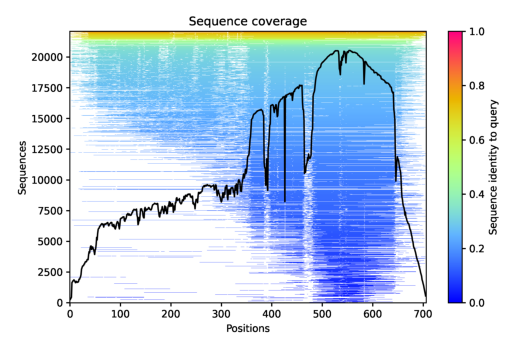

In [98]:
print('FGFR2_05cfe_coverage')
plt.imshow(image, cmap = 'gray')
plt.axis('off')
plt.show()

График показывает, что предсказанная структура не полностью соотвествует структуке белков содержащихся в базе NCBI.

In [100]:
image = cv2.imread('/content/drive/MyDrive/Data since in Healthcare/IMBG/FGFR2_05cfe_plddt.png')

FGFR2_05cfe_plddt.png


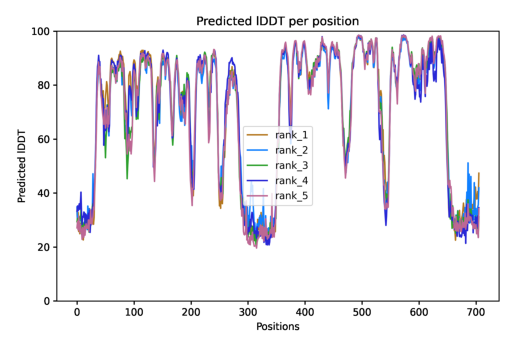

In [101]:
print('FGFR2_05cfe_plddt.png')
plt.imshow(image, cmap = 'gray')
plt.axis('off')
plt.show()

In [102]:
image = cv2.imread('/content/drive/MyDrive/Data since in Healthcare/IMBG/FGFR2_05cfe_pae.png')

In [111]:
image_rsize = cv2.resize(image, (4000,700))

FGFR2_05cfe_pae.png


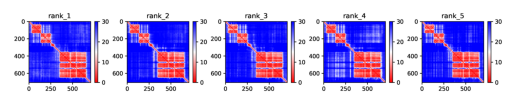

In [112]:
print('FGFR2_05cfe_pae.png')
plt.imshow(image_rsize, cmap = 'gray')
plt.axis('off')
plt.show()

In [4]:
!pip install py3dmol

In [5]:
!pip install colabfold

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

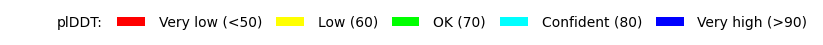

In [6]:
#@title Display 3D structure [Alpha Fold] {run: "auto"}
import py3Dmol
import glob
import matplotlib.pyplot as plt
from colabfold.colabfold import plot_plddt_legend
from colabfold.colabfold import pymol_color_list, alphabet_list
rank_num = 1 #@param ["1", "2", "3", "4", "5"] {type:"raw"}
color = "lDDT" #@param ["chain", "lDDT", "rainbow"]
show_sidechains = False #@param {type:"boolean"}
show_mainchains = False #@param {type:"boolean"}

# tag = results["rank"][0][rank_num - 1]
# jobname_prefix = ".custom" if msa_mode == "custom" else ""
# pdb_filename = f"{jobname}/{jobname}{jobname_prefix}_unrelaxed_{tag}.pdb"
# pdb_file = glob.glob(pdb_filename)

pdb_filename = f'/content/drive/MyDrive/Data since in Healthcare/IMBG/FGFR2_05cfe_unrelaxed_rank_005_alphafold2_ptm_model_3_seed_000.pdb'
pdb_file = glob.glob(pdb_filename)

def show_pdb(rank_num=1, show_sidechains=False, show_mainchains=False, color="lDDT"):
  model_name = f"rank_{rank_num}"
  view = py3Dmol.view(js='https://3dmol.org/build/3Dmol.js',)
  view.addModel(open(pdb_file[0],'r').read(),'pdb')

  if color == "lDDT":
    view.setStyle({'cartoon': {'colorscheme': {'prop':'b','gradient': 'roygb','min':50,'max':90}}})
  elif color == "rainbow":
    view.setStyle({'cartoon': {'color':'spectrum'}})
  elif color == "chain":
    chains = len(queries[0][1]) + 1 if is_complex else 1
    for n,chain,color in zip(range(chains),alphabet_list,pymol_color_list):
       view.setStyle({'chain':chain},{'cartoon': {'color':color}})

  if show_sidechains:
    BB = ['C','O','N']
    view.addStyle({'and':[{'resn':["GLY","PRO"],'invert':True},{'atom':BB,'invert':True}]},
                        {'stick':{'colorscheme':f"WhiteCarbon",'radius':0.3}})
    view.addStyle({'and':[{'resn':"GLY"},{'atom':'CA'}]},
                        {'sphere':{'colorscheme':f"WhiteCarbon",'radius':0.3}})
    view.addStyle({'and':[{'resn':"PRO"},{'atom':['C','O'],'invert':True}]},
                        {'stick':{'colorscheme':f"WhiteCarbon",'radius':0.3}})
  if show_mainchains:
    BB = ['C','O','N','CA']
    view.addStyle({'atom':BB},{'stick':{'colorscheme':f"WhiteCarbon",'radius':0.3}})

  view.zoomTo()
  return view

show_pdb(rank_num, show_sidechains, show_mainchains, color).show()
if color == "lDDT":
  plot_plddt_legend().show()

In [7]:
#@title Display 3D structure [NCBI] {run: "auto"}
import py3Dmol
import glob
import matplotlib.pyplot as plt
from colabfold.colabfold import plot_plddt_legend
from colabfold.colabfold import pymol_color_list, alphabet_list
rank_num = 5 #@param ["1", "2", "3", "4", "5"] {type:"raw"}
color = "rainbow" #@param ["chain", "lDDT", "rainbow"]
show_sidechains = False #@param {type:"boolean"}
show_mainchains = False #@param {type:"boolean"}

# tag = results["rank"][0][rank_num - 1]
# jobname_prefix = ".custom" if msa_mode == "custom" else ""
# pdb_filename = f"{jobname}/{jobname}{jobname_prefix}_unrelaxed_{tag}.pdb"
# pdb_file = glob.glob(pdb_filename)

pdb_filename = f'/content/drive/MyDrive/Data since in Healthcare/IMBG/6LVL.pdb'
pdb_file = glob.glob(pdb_filename)

def show_pdb(rank_num=1, show_sidechains=False, show_mainchains=False, color="lDDT"):
  model_name = f"rank_{rank_num}"
  view = py3Dmol.view(js='https://3dmol.org/build/3Dmol.js',)
  view.addModel(open(pdb_file[0],'r').read(),'pdb')

  if color == "lDDT":
    view.setStyle({'cartoon': {'colorscheme': {'prop':'b','gradient': 'roygb','min':50,'max':90}}})
  elif color == "rainbow":
    view.setStyle({'cartoon': {'color':'spectrum'}})
  elif color == "chain":
    chains = len(queries[0][1]) + 1 if is_complex else 1
    for n,chain,color in zip(range(chains),alphabet_list,pymol_color_list):
       view.setStyle({'chain':chain},{'cartoon': {'color':color}})

  if show_sidechains:
    BB = ['C','O','N']
    view.addStyle({'and':[{'resn':["GLY","PRO"],'invert':True},{'atom':BB,'invert':True}]},
                        {'stick':{'colorscheme':f"WhiteCarbon",'radius':0.3}})
    view.addStyle({'and':[{'resn':"GLY"},{'atom':'CA'}]},
                        {'sphere':{'colorscheme':f"WhiteCarbon",'radius':0.3}})
    view.addStyle({'and':[{'resn':"PRO"},{'atom':['C','O'],'invert':True}]},
                        {'stick':{'colorscheme':f"WhiteCarbon",'radius':0.3}})
  if show_mainchains:
    BB = ['C','O','N','CA']
    view.addStyle({'atom':BB},{'stick':{'colorscheme':f"WhiteCarbon",'radius':0.3}})

  view.zoomTo()
  return view

show_pdb(rank_num, show_sidechains, show_mainchains, color).show()
if color == "lDDT":
  plot_plddt_legend().show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

__Предсказанная модель имеет общие черты с референсной моделью `6LVL` (`MMDB ID: 186071`) содержащейся в базе данных.__
_____________________________________
[Human fibroblast growth factor receptor 2] рецептор фактора роста фибробластов 2 типа человека